
모델 -  앙상블 
    - 취합  - Random Forests(Extra), voting
    - boosting - Adaboost, xgboost


1. gridsearchCV 굵직하게
    - param 여러개 선택 가능

1. Validation_curve -> 세밀하게 검증
    - param 한개에 대해 변화시키면서 확인


In [1]:
%matplotlib inline
# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.model_selection import validation_curve
# from sklearn.preprocessing import StandardScaler
# import pickle

In [2]:
from sklearn.datasets import load_iris
iris= load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.rename( { 'sepal length (cm)':'Sepal_length', 
             'sepal width (cm)' :'Sepal_width', 
             'petal length (cm)':'Petal_length',
             'petal width (cm)' : 'Petal_width',
             },inplace=True, axis='columns')
X = df[['Sepal_length', 'Sepal_width', 'Petal_length','Petal_width']]
y = df['species']

---

In [3]:
#make model
forest = ExtraTreesClassifier()
# range setting
estimator_range = range(5, 100, 20)
depth_range = range(1, 30, 3)
# grid setting
param_grid = {
    'n_estimators': estimator_range,
    'max_features': ['auto', 'log2'],
    'max_depth': depth_range
}

In [4]:
# matke GS
gs = GridSearchCV(estimator=forest, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1
                 ,return_train_score=True)
%time gs = gs.fit(X, y)

CPU times: user 1.16 s, sys: 43.6 ms, total: 1.21 s
Wall time: 22.1 s


In [5]:
print("best_params", gs.best_params_)
print("best_score", gs.best_score_)

best_params {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 45}
best_score 0.9666666666666667


In [6]:
forest = ExtraTreesClassifier(max_features='log2')

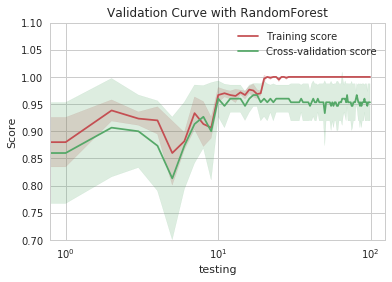

In [7]:
train_scores_mean =gs.cv_results_['mean_train_score']
train_scores_std = gs.cv_results_['std_train_score']
test_scores_mean = gs.cv_results_['mean_test_score']
test_scores_std = gs.cv_results_['std_test_score']

param_range = range(len(train_scores_mean)) # 사이즈에 맞게 range 변경

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with RandomForest")
plt.xlabel("testing")
plt.ylabel("Score")
plt.ylim(0.7, 1.1)
plt.show()

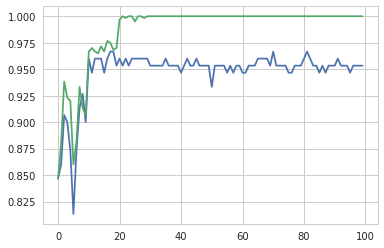

In [8]:
%matplotlib inline
plt.plot(gs.cv_results_["mean_test_score"])
plt.plot(gs.cv_results_["mean_train_score"])
plt.show()

과최적화가 보이는듯함 - > 미세 조정 필요!

In [9]:
# range setting
print(estimator_range)
print(depth_range)

range(5, 100, 20)
range(1, 30, 3)


### validation curve 
 - estimator 

In [10]:
%%time
param_range=estimator_range
train_scores, test_scores = \
    validation_curve(forest, X, y, 
                     param_name="n_estimators", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=-1)

CPU times: user 218 ms, sys: 44.6 ms, total: 263 ms
Wall time: 2.67 s


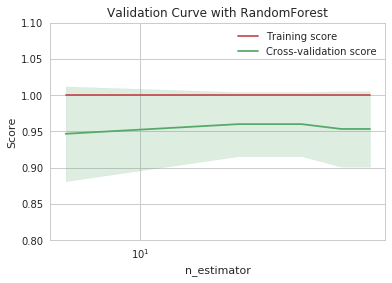

In [11]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with RandomForest")
plt.xlabel("n_estimator")
plt.ylabel("Score")
plt.ylim(0.8, 1.1)
plt.show()

### n_estimator는 큰 차이 없음

 - max_depth

In [12]:
%%time
param_range=depth_range
train_scores, test_scores = \
    validation_curve(forest, X, y, 
                     param_name="max_depth", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=-1)

CPU times: user 293 ms, sys: 56.5 ms, total: 349 ms
Wall time: 1.47 s


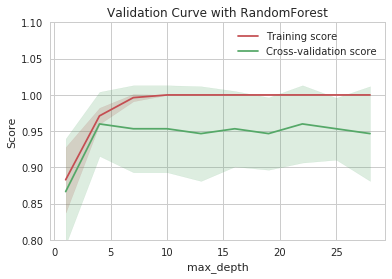

In [13]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with RandomForest")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.8, 1.1)
plt.show()

### max_depth 조정으로 오버피팅 체크